First, load the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Select the ticker of interest.

In [2]:
ticker = 'TSLA'

Load the data.

In [3]:
ticker_file = ticker + '.csv'
data = pd.read_csv(ticker_file, parse_dates=['Date'])
data = data.sort_values(by='Date')
data.set_index('Date', inplace=True)
data['Returns'] = data['Adj Close'].pct_change()  # Create daily returns column
returns = data['Returns'].dropna()  # Remove values of N/A

Compute statistical data.

In [4]:
avg_daily_return = np.mean(returns)
std_dev = np.std(returns)

Calculate VaR and CVaR.

In [5]:
var95 = np.percentile(returns, 5)
print('var: %0.4f' % var95)
cvar95 = returns[returns <= var95].mean()
print('cvar: %0.4f' % cvar95)

var: -0.0424
cvar: -0.0639


Calculate drawdown.

In [6]:
cum_rets_dollars = data['Adj Close']
running_max = cum_rets_dollars.cummax()
drawdown = (cum_rets_dollars) / running_max - 1

Plot drawdown.

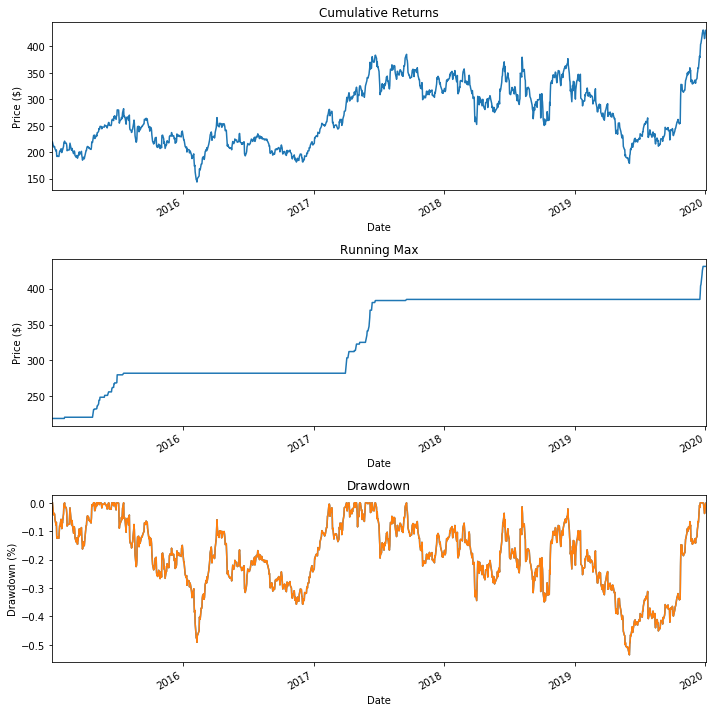

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Price ($)')
cum_rets_dollars.plot()
plt.tight_layout()

plt.subplot(3,1,2)
plt.title('Running Max')
plt.xlabel('Date')
plt.ylabel('Price ($)')
running_max.plot()

plt.subplot(3,1,3)
drawdown.plot()
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
drawdown.plot()
plt.tight_layout()
plt.show()

Define constants.

In [8]:
T = 252  # Time period of interest for Monte Carlo simulation
S0 = cum_rets_dollars.iloc[-1]  # most recent stock price
NUM_SIM = 1000  # Number of Monte Carlo simulations

Re-compute VaR and CVar using only data from the most recent T days.

In [9]:
returns_comp = returns.tail(T)
var95 = np.percentile(returns_comp, 5)
print('var: %0.4f' % var95)
cvar95 = returns_comp[returns_comp <= var95].mean()
print('cvar: %0.4f' % cvar95)

var: -0.0452
cvar: -0.0743


Monte Carlo simulation.

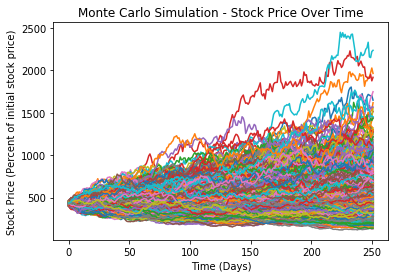

In [10]:
for i in range(NUM_SIM):
    rand_rets = np.random.normal(avg_daily_return, std_dev, T)  # Generate a random daily stock return using the stock's historical statistical data

    # Create cumulative returns data
    cum_rets = rand_rets + 1
    forecast = S0 * (cum_rets.cumprod())

    # Plot the Monte Carlo simulations over time
    plt.plot(forecast)
    plt.title('Monte Carlo Simulation - Stock Price Over Time')
    plt.xlabel('Time (Days)')
    plt.ylabel('Stock Price (Percent of initial stock price)')
plt.show()

Calculate Monte Carlo average VaR

In [11]:
var = np.percentile(rand_rets, 5)
print('Monte Carlo var: %0.4f' % var)

Monte Carlo var: -0.0406


Create histogram of daily stock returns.

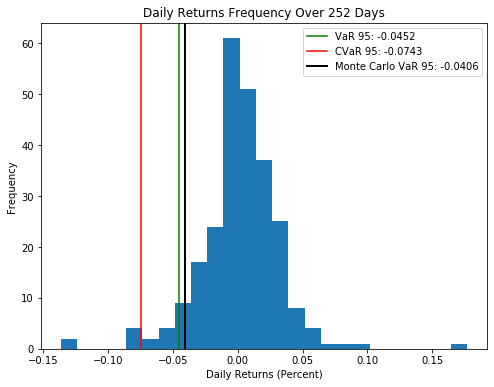

In [12]:
plt.figure(figsize=(8,6))
plt.hist(returns_comp, bins=25)
plt.title('Daily Returns Frequency Over %d Days' % T)
plt.xlabel('Daily Returns (Percent)')
plt.ylabel('Frequency')
plt.axvline(x=var95, color='green', label='VaR 95: %0.4f' % var95)  # plot the historical VaR on the histogram
plt.axvline(x=cvar95, color='red', label='CVaR 95: %0.4f' % cvar95)  # plot the historical CVar on the histogram
plt.axvline(x=var, color='black', linewidth=2, label='Monte Carlo VaR 95: %0.4f' % var)  # plot the Monte Carlo VaR on the histogram
plt.legend()
plt.show()